In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde
from scipy import stats
###loading basic data frame###
filename = 'input_data.csv'
total_df = pd.read_csv(filename)
df = total_df.iloc[:, [0, 1, 5, 8, 9, 10, 11]]
df.head()

,DRG Definition,Provider Id,Provider State,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,AL,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,AL,14,$15131.85,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,AL,24,$37560.37,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,AL,25,$13998.28,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,AL,18,$31633.27,$5658.33,$4851.44


## 1. Distributions and Outliers
**Read in the data and plot histograms/densities or scatter plots for each of the following.<br>
Make sure to label the axis of the plots appropriately.**

**(a) Total Discharges**

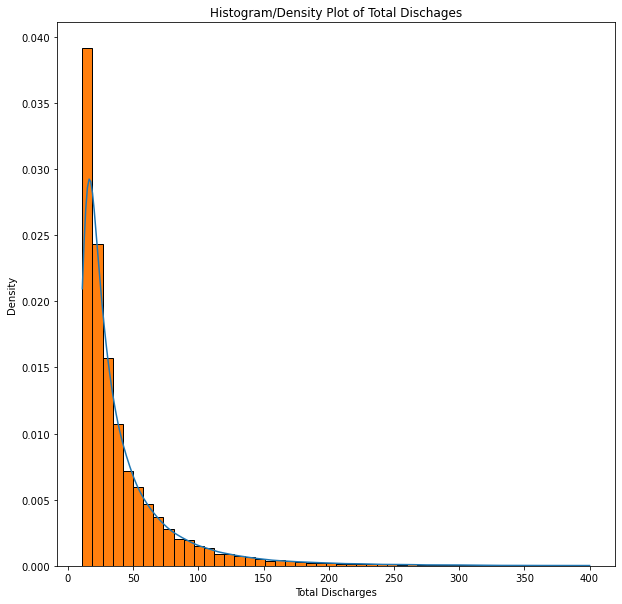

In [2]:
discharges = df.loc[:, ' Total Discharges ']

density = kde.gaussian_kde(discharges)
x = np.linspace(discharges.min(), 400, 300)
y = density(x)

plt.rcParams["figure.figsize"] = (10, 10)
plt.plot(x, y)
plt.hist(discharges, range=(discharges.min(), 400),
        density=True, edgecolor='black', linewidth=1, bins=50)
plt.title("Histogram/Density Plot of Total Dischages")
plt.xlabel("Total Discharges")
plt.ylabel("Density")
plt.show()

Below boxplot shows outliers with 'o' with iqr outlier dectection.
However, there is an outlier which is much larger than others.
The outlier is printed at below the boxplot<br>

**DRG Charge 470 is "MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY WITHOUT MAJOR COMPLICATION OR
COMORBIDITY" and the location of the provider is New York, Manhattan.<br>
Based on environment of New York, where exists lots of traffic jams and it's popularity. It can be expected.**

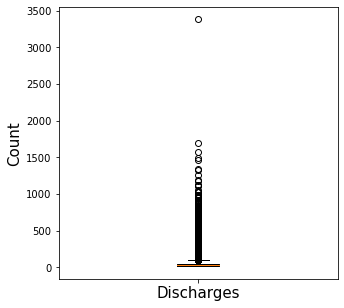

DRG Definition                          470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...
Provider Id                                                                        330270
Provider Name                                                HOSPITAL FOR SPECIAL SURGERY
Provider Street Address                                              535 EAST 70TH STREET
Provider City                                                                    NEW YORK
Provider State                                                                         NY
Provider Zip Code                                                                   10021
Hospital Referral Region Description                                       NY - Manhattan
 Total Discharges                                                                    3383
 Average Covered Charges                                                        $53113.58
 Average Total Payments                                                         $19023.70
Average Me

In [3]:
plt.rcParams["figure.figsize"] = (5, 5)

plt.boxplot(discharges.values)
plt.xticks([1], ['Discharges'], fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

discharge_max = total_df.loc[df[' Total Discharges '].idxmax()]
discharge_max

**(b) Average Covered Charges**

<ipython-input-4-c2ddfca60775>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  covered_charges = covered_charges.str.replace('$', '')


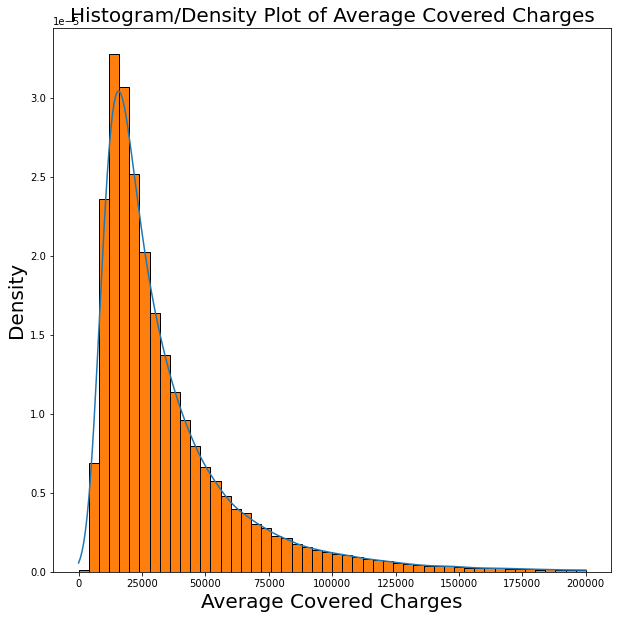

In [4]:
covered_charges = df.loc[:, ' Average Covered Charges ']

covered_charges = covered_charges.str.replace('$', '')
covered_charges = covered_charges.astype(float)
density = kde.gaussian_kde(covered_charges)
x = np.linspace(-2, 200000, 300)
y = density(x)

plt.rcParams["figure.figsize"] = (10, 10)

plt.plot(x, y)
plt.hist(covered_charges, range=(0, 200000), density=True, edgecolor='black', linewidth=1, bins = 50)
plt.title("Histogram/Density Plot of Average Covered Charges", fontsize=20)
plt.xlabel("Average Covered Charges", fontsize=20)
plt.ylabel("Density", fontsize=20)

plt.show()

Below boxplot shows outliers with 'o' with iqr outlier dectection.<br>
However, there are two outliers which is much larger than others.<br>
The outliers are printed at below the boxplot.<br>
<br>
These two cannot be predicted based on DRG Charges and Provider's location.

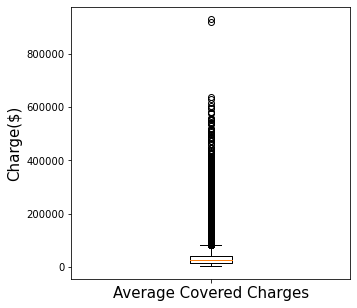

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
100330,"391 - ESOPHAGITIS, GASTROENT & MISC DIGEST DIS...",50496,JOHN MUIR MEDICAL CENTER - CONCORD CAMPUS,2540 EAST ST,CONCORD,CA,94520,CA - Contra Costa County,27,$99999.44,$11707.74,$10821.85
50722,252 - OTHER VASCULAR PROCEDURES W MCC,360020,SUMMA HEALTH SYSTEMS HOSPITALS,525 EAST MARKET STREET,AKRON,OH,44309,OH - Akron,20,$99992.50,$21915.95,$18937.75


In [5]:
plt.rcParams["figure.figsize"] = (5, 5)
plt.boxplot(covered_charges.values)
plt.xticks([1], ['Average Covered Charges'], fontsize=15)
plt.ylabel("Charge($)", fontsize=15)
plt.show()
covered_sorted = total_df
covered_sorted = covered_sorted.sort_values(by=[' Average Covered Charges '], ascending=False)
covered_sorted.head(2)

**(c) Average Total Payments vs. Average Medicare Payments**

<ipython-input-6-1c988bf883f2>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  atp_amp[' Average Total Payments '] = atp_amp[' Average Total Payments '].str.replace('$', '')
<ipython-input-6-1c988bf883f2>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  atp_amp['Average Medicare Payments'] = atp_amp['Average Medicare Payments'].str.replace('$', '')


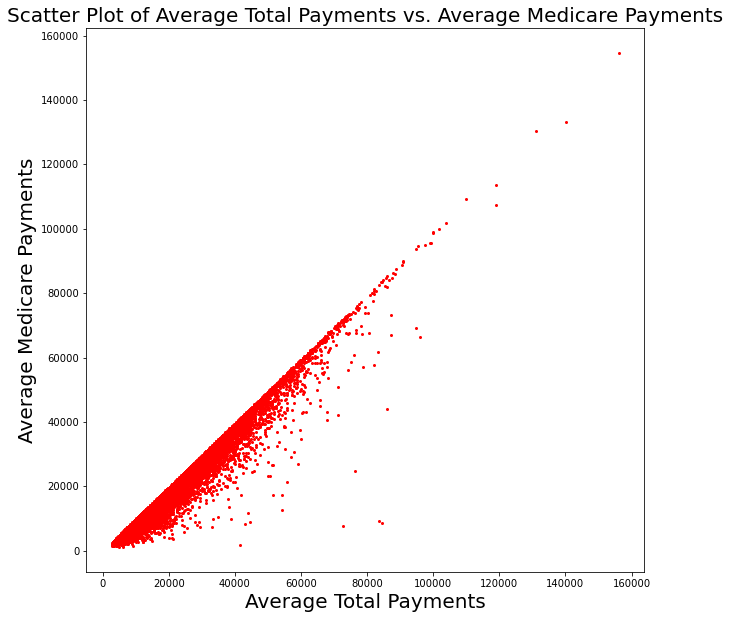

In [6]:
atp_amp = df.loc[:, [' Average Total Payments ', 'Average Medicare Payments']]
atp_amp[' Average Total Payments '] = atp_amp[' Average Total Payments '].str.replace('$', '')
atp_amp[' Average Total Payments '] = atp_amp[' Average Total Payments '].astype(float)
atp_amp['Average Medicare Payments'] = atp_amp['Average Medicare Payments'].str.replace('$', '')
atp_amp['Average Medicare Payments'] = atp_amp['Average Medicare Payments'].astype(float)

plt.rcParams["figure.figsize"] = (10, 10)

plt.plot(' Average Total Payments ', 'Average Medicare Payments',
        data=atp_amp, linestyle='none', marker='o', markersize=2, color='red')
plt.title('Scatter Plot of Average Total Payments vs. Average Medicare Payments', fontsize=20)
plt.xlabel('Average Total Payments', fontsize=20)
plt.ylabel('Average Medicare Payments', fontsize=20)

plt.show()

As you can see at the scatter plot, average total payments and average medicare payments shows tendency of y=x line.
However, there are some data which are apart from tendency. They are printed below.<br><br>
The location of the outliers are very small states. Because they are small, there can be lots of poors and it is expected that medicare payments are
alot less than total payments.

In [7]:
total_df[(atp_amp[' Average Total Payments '] - atp_amp['Average Medicare Payments']) > 70000]

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
47957,247 - PERC CARDIOVASC PROC W DRUG-ELUTING STEN...,430095,AVERA HEART HOSPITAL OF SOUTH DAKOTA LLC,4500 W 69TH ST,SIOUX FALLS,SD,57108,SD - Sioux Falls,121,$43844.23,$83484.14,$9316.11
49145,249 - PERC CARDIOVASC PROC W NON-DRUG-ELUTING ...,500051,OVERLAKE HOSPITAL MEDICAL CENTER,1035-116TH AVE NE,BELLEVUE,WA,98004,WA - Seattle,23,$44499.00,$84499.26,$8500.60


**(d) Average Covered Charges vs. Average Medicare Payments**

<ipython-input-8-6b3fa1849172>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  acc_amp[' Average Covered Charges '] = acc_amp[' Average Covered Charges '].str.replace('$', '')
<ipython-input-8-6b3fa1849172>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  acc_amp['Average Medicare Payments'] = acc_amp['Average Medicare Payments'].str.replace('$', '')


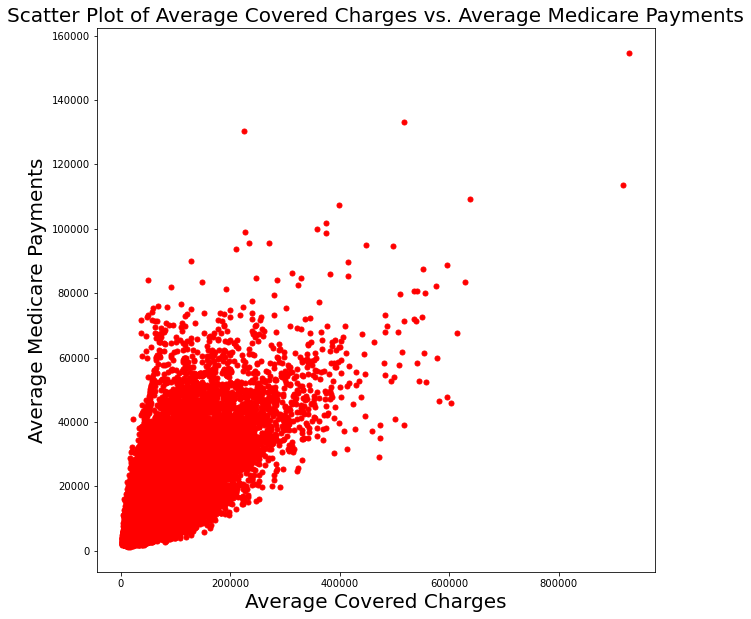

In [8]:
acc_amp = df.loc[:, [' Average Covered Charges ', 'Average Medicare Payments']]
acc_amp[' Average Covered Charges '] = acc_amp[' Average Covered Charges '].str.replace('$', '')
acc_amp[' Average Covered Charges '] = acc_amp[' Average Covered Charges '].astype(float)
acc_amp['Average Medicare Payments'] = acc_amp['Average Medicare Payments'].str.replace('$', '')
acc_amp['Average Medicare Payments'] = acc_amp['Average Medicare Payments'].astype(float)

plt.rcParams["figure.figsize"] = (10, 10)

plt.plot(' Average Covered Charges ', 'Average Medicare Payments',
            data=acc_amp, linestyle='none', marker='o', markersize=5, color='red')
plt.title('Scatter Plot of Average Covered Charges vs. Average Medicare Payments', fontsize=20)
plt.xlabel('Average Covered Charges', fontsize=20)
plt.ylabel('Average Medicare Payments', fontsize=20)
plt.show()

As you can see at the scatter plot, average total payments and average medicate payments makes a cluster.
However, there are some data which are apart from cluster. Four representative data are printed below.<br><br>
The location of outliers are rich neighborhoods and it can cause extraordinary medicare payments and covered charges. This outliers could be
expected

In [10]:
total_df[(acc_amp[' Average Covered Charges '] > 700000) | (acc_amp['Average Medicare Payments'] > 120000)]

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
39529,207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,50195,WASHINGTON HOSPITAL,2000 MOWRY AVE,FREMONT,CA,94538,CA - Alameda County,11,$918023.18,$119113.00,$113462.09
39562,207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,50441,STANFORD HOSPITAL,300 PASTEUR DRIVE,STANFORD,CA,94305,CA - San Mateo County,11,$929118.90,$156158.18,$154620.81
109462,460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC,150166,PINNACLE HOSPITAL,9301 CONNECTICUT DR,CROWN POINT,IN,46307,IN - Gary,14,$225729.14,$131187.35,$130466.57
150793,853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...,330234,WESTCHESTER MEDICAL CENTER,100 WOODS RD,VALHALLA,NY,10595,NY - White Plains,15,$517381.33,$140255.26,$133177.26


## 2 Transforming Data
**There are 100 values of DRG Definition. Construct 100 DRG Charges features, one for
each unique value of DRG Definition. The feature should record the Average Covered
Charges for the specified DRG category. Then construct a transformed version of the data
that only includes the provider id, provider state, and the 100 new DRG Charges features.
For example, the data should look like the format in the table below. Make sure to include
missing values for any provider that doesn’t have a charge for a specific DRG.**

In [11]:
df_copy = df
df_copy['DRG Charges'] = df_copy['DRG Definition'].str.split().str[0]
df_copy = df_copy[['Provider Id', 'Provider State', 'DRG Charges', ' Average Covered Charges ']]
df_copy[' Average Covered Charges '] = df_copy[' Average Covered Charges '].str.replace('$', '')
df_copy[' Average Covered Charges '] = df_copy[' Average Covered Charges '].astype(float)
df_group = df_copy.groupby(['Provider Id', 'Provider State'])

drg_list = df_copy['DRG Charges'].tolist()
new_list = []

for drg in drg_list:
    if drg not in new_list:
        new_list.append(drg)
        
trans = pd.DataFrame()
trans['Provider Id'] = ''
trans['Provider State'] = ''

for drg in new_list:
    new_str = "DRG Charges " + drg
    trans[new_str] = ''
    
for name, group in df_group:
    new_dict = {'Provider Id' : group.iloc[0, 0], 'Provider State' : group.iloc[0,1]}
    for i in range(len(group)):
        new_str = "DRG Charges " + group.iloc[i,2]
        new_dict[new_str] = group.iloc[i,3]
        
    trans = trans.append(new_dict, ignore_index = True)
    
trans.head()

<ipython-input-11-035e3f7ff8b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['DRG Charges'] = df_copy['DRG Definition'].str.split().str[0]
<ipython-input-11-035e3f7ff8b2>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_copy[' Average Covered Charges '] = df_copy[' Average Covered Charges '].str.replace('$', '')
<ipython-input-11-035e3f7ff8b2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

,Provider Id,Provider State,DRG Charges 039,DRG Charges 057,DRG Charges 069,DRG Charges 064,DRG Charges 065,DRG Charges 066,DRG Charges 074,DRG Charges 101,...,DRG Charges 812,DRG Charges 853,DRG Charges 885,DRG Charges 870,DRG Charges 871,DRG Charges 872,DRG Charges 897,DRG Charges 948,DRG Charges 917,DRG Charges 918
0,10001,AL,32963.07,20312.78,20688.83,38820.39,27345.10,17605.51,18489.15,19619.7,...,19670.22,73419.78,17627.12,129694.04,44643.01,25434.18,12254.78,19081.72,53962.00,16583.15
1,10005,AL,15131.85,NaN,14260.00,22946.38,16930.43,17170.27,NaN,NaN,...,11610.00,NaN,NaN,NaN,26056.59,14409.25,NaN,9381.09,NaN,4973.93
2,10006,AL,37560.37,NaN,17091.66,45393.21,27320.14,16392.37,NaN,18362.2,...,19065.81,160186.05,10376.13,NaN,49858.93,21602.83,10866.42,17894.59,34537.27,14834.22
3,10007,AL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7808.31,NaN,NaN,NaN,22160.90,NaN,NaN,6891.18,NaN,NaN
4,10008,AL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8937.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3 Correlation and Scatterplots
**On the new transformed version of the data, explore the relationships among the 100
DRG Charges features. Identify two pairs of DRG Charges features with highest positive
associations and two pairs with lowest positive associations. For each of the four pairs of
features**

**Associations Definition that I defined :<br>
Numbers of data that are both not null.**
<br><br>
Lowest Two :<br>
473-885<br>
251-885<br>
Highest Two :<br>
194-392<br>
194-690

In [13]:
association_dict = {}
for i in range(len(new_list)):
    for j in range(i + 1, len(new_list)):
        association_dict[new_list[i]+"-"+new_list[j]]\
        = len(trans[((trans["DRG Charges " + new_list[i]].notnull()) & (trans["DRG Charges " + new_list[j]].notnull()))])
        
association_sorted = sorted(association_dict.items(), key=lambda x:x[1])

print("Lowest Two : ")
print(association_sorted[0][0])
print(association_sorted[1][0])

print("\nHighest Two : ")
print(association_sorted[-2][0])
print(association_sorted[-1][0])

Lowest Two : 
473-885
251-885

Highest Two : 
194-392
194-690


**(a) Plot scatterplots. Plot a scatterplot to show their relationship. Make sure to label
both axis of the plot with the feature names. Discuss whether the observed relations are
interesting or expected, given the DRG category names. (This will result in 4 scatter
plots total. (Two are from positive pairs and two are and from negative pairs.))**

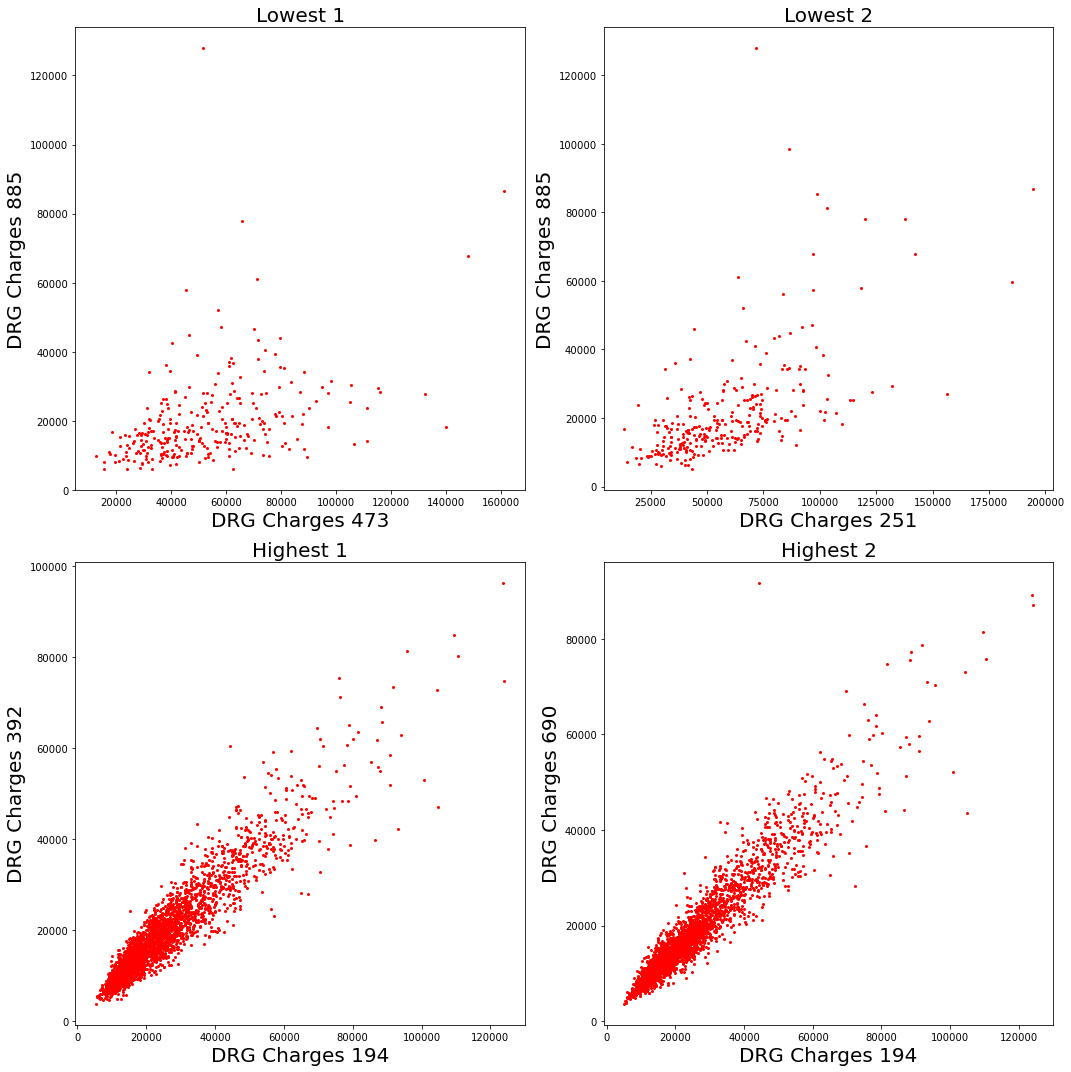

In [14]:
plt.rcParams["figure.figsize"] = (15, 15)

plt.subplot(221)
plt.title("Lowest 1", fontsize=20)
plt.plot('DRG Charges 473', 'DRG Charges 885',
        data=trans, linestyle='none', marker='o', markersize=2, color='red')
plt.xlabel('DRG Charges 473', fontsize=20)
plt.ylabel('DRG Charges 885', fontsize=20)

plt.subplot(222)
plt.title("Lowest 2", fontsize=20)
plt.plot('DRG Charges 251', 'DRG Charges 885',
        data=trans, linestyle='none', marker='o', markersize=2, color='red')
plt.xlabel('DRG Charges 251', fontsize=20)
plt.ylabel('DRG Charges 885', fontsize=20)

plt.subplot(223)
plt.title("Highest 1", fontsize=20)
plt.plot('DRG Charges 194', 'DRG Charges 392',
        data=trans, linestyle='none', marker='o', markersize=2, color='red')
plt.xlabel('DRG Charges 194', fontsize=20)
plt.ylabel('DRG Charges 392', fontsize=20)

plt.subplot(224)
plt.title("Highest 2", fontsize=20)
plt.plot('DRG Charges 194', 'DRG Charges 690',
        data=trans, linestyle='none', marker='o', markersize=2, color='red')
plt.xlabel('DRG Charges 194', fontsize=20)
plt.ylabel('DRG Charges 690', fontsize=20)

plt.tight_layout()

plt.show()

Scatter plots of high associations shows interesting result.<br>
They shows some tendency even though DRG Charges are different.<br>
This can be explained that, if a DRG Charges' average covered charge is high, than others are also high.<br><br>
Contrary, plots of low associations shows no tendency.<br>
It is may caused by lack of data. However, even if there are less data, there are too much extraordinary values.

**(b) Compute correlations. Calculate the correlation among the selected features and
report. Discuss whether the correlations support your observations from the scatterplot
above.**

In [15]:
print("Lowest Two")
print("DRG Charges 473 - 885 : ", end="")
print(trans[["DRG Charges 473", "DRG Charges 885"]].corr(method='pearson').iloc[0, 1])
print("DRG Charges 251 - 885 : ", end="")
print(trans[["DRG Charges 251", "DRG Charges 885"]].corr(method='pearson').iloc[0, 1])
print("\nHighest Two")
print("DRG Charges 194 - 392 : ", end="")
print(trans[["DRG Charges 194", "DRG Charges 392"]].corr(method='pearson').iloc[0, 1])
print("DRG Charges 194 - 690 : ", end="")
print(trans[["DRG Charges 194", "DRG Charges 690"]].corr(method='pearson').iloc[0, 1])

Lowest Two
DRG Charges 473 - 885 : 0.4055749031389195
DRG Charges 251 - 885 : 0.6039109914519922

Highest Two
DRG Charges 194 - 392 : 0.9345589294087959
DRG Charges 194 - 690 : 0.9463900697074533


As I said above, DRG Charges with high associations shows a tendency, and correlations support this opinion.
Numbers are greater than 0.9, and we can tell that they show tendency.<br><br>
Contrary, DRG Charges with low associations have low correlations.
Numbers are smaller than 0.65 which means it shows low tendency.

## 4 Boxplots and T-tests
**On the new transformed version of the data, explore how the DRG Charge features vary
with Provider State.**

**(a) Boxplots.<br>
• Select six states that you think may exhibit differences in their hospital charges
(consider e.g., geographic, size, political differences). We note that there is no
exact answer here. We will evaluate your logical process and justification. Find a
DRG Charge feature that shows some variation across the six selected states. Plot
a box plot to show the variation (i.e., the six Provider States vs. the selected
DRG Charge). (Justify your choice.) Make sure to label both axes of the plot with
the appropriate attribute names/values.<br><br>
• Select any two other DRG Charge features to repeat 4-(a). Make sure to use the
same six selected states. (This will result in 3 box plots total. For example, x-axis
represents six states and y-axis presents their distribution with box-plots. You
need to plot them for the total 3 different DRG Charge features.)<br><br>**

**Selected State and Reason**<br>
AK : State apart from main country<br>
CA : State that represents Western coast<br>
HI : State that is island<br>
NV : State that has world's largest casino, Las Vegas<br>
NY : State that represents Estern coast<br>
TX : State that represents Inland<br><br>
    
**Condition of Selected DRG Charges**<br>
From top 15 DRG Charges' number of data, select 3 that show most difference in boxplot with the naked eye.<br>
The reason I selected like this is because a number of data makes statistics more accurate.

In [18]:
plt.rcParams["figure.figsize"] = (10, 10)

def state_box_plot(drg):
    AK = trans[(trans['Provider State'] == 'AK') & trans['DRG Charges '+drg].notnull()]['DRG Charges '+drg].values
    CA = trans[(trans['Provider State'] == 'CA') & trans['DRG Charges '+drg].notnull()]['DRG Charges '+drg].values
    HI = trans[(trans['Provider State'] == 'HI') & trans['DRG Charges '+drg].notnull()]['DRG Charges '+drg].values
    NV = trans[(trans['Provider State'] == 'NV') & trans['DRG Charges '+drg].notnull()]['DRG Charges '+drg].values
    NY = trans[(trans['Provider State'] == 'NY') & trans['DRG Charges '+drg].notnull()]['DRG Charges '+drg].values
    TX = trans[(trans['Provider State'] == 'TX') & trans['DRG Charges '+drg].notnull()]['DRG Charges '+drg].values
    
    plt.boxplot([AK, CA, HI, NV, NY, TX])
    plt.title("Average Covered Charges of DRG Charge "+drg, fontsize=20)
    plt.xticks([1, 2, 3, 4, 5, 6], ['AK', 'CA', 'HI', 'NV', 'NY', 'TX'], fontsize=20)
    plt.xlabel("States", fontsize=20)
    plt.ylabel("Average Covered Charges", fontsize=20)
    plt.show()

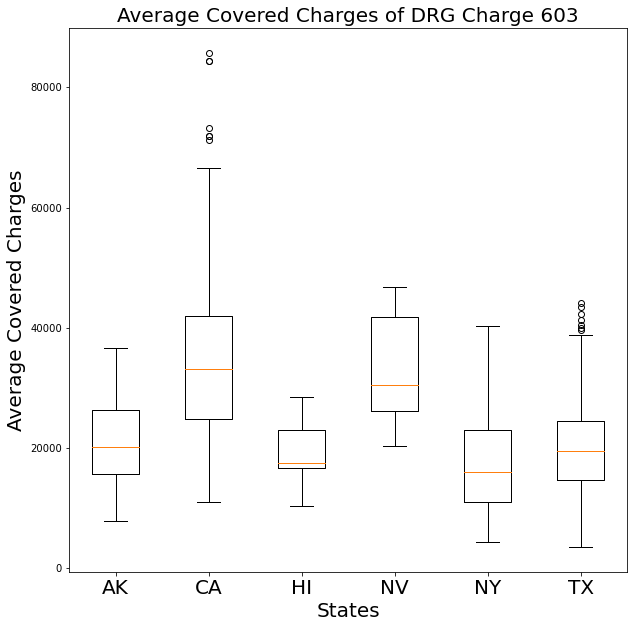

In [19]:
state_box_plot('603')

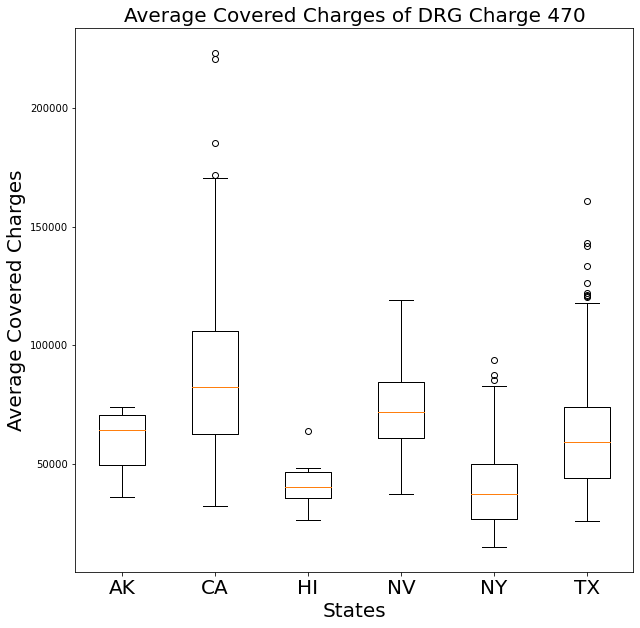

In [20]:
state_box_plot('470')

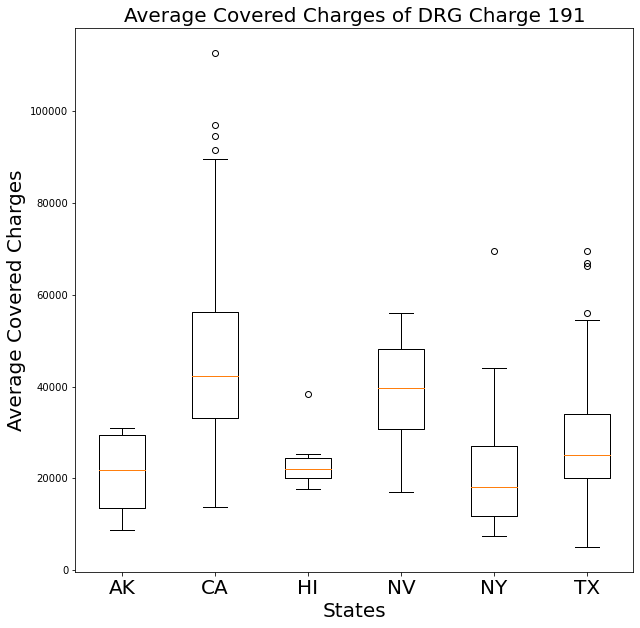

In [21]:
state_box_plot('191')

**(b) Formulate and test claim (1).<br>
• Based on the three box plots, identify the pair of states that you think have the
most significant differences in their charges for a single DRG category. Explicitly
state your hypothesis in terms of H0 and H1.<br>
• Perform a two-sample Student’s t-test to assess your hypotheses. State whether
you are performing a one-sided or two-sided test. Report the resulting t statistic
and p-value. Discuss whether the results support your claim(s).**

Selected DRG Charges : 470.<br>
Selected States : CA , NY<br>
Performed Test : Two-sided Test<br><br>
H0 : Mean of CA and NY are not different<br>
H1 : Mean of CA and Ny are significantly different

In [22]:
### 470 CA NY
CA_470 = trans[(trans['Provider State'] == 'CA') & trans['DRG Charges 470'].notnull()]['DRG Charges 470'].values
NY_470 = trans[(trans['Provider State'] == 'NY') & trans['DRG Charges 470'].notnull()]['DRG Charges 470'].values
result = stats.ttest_ind(CA_470, NY_470)
print('T-test Result(F) : %.3f \np-value : %.3f' % (result))

T-test Result(F) : 15.316 
p-value : 0.000


p-value is 0 and it is less than 0.05. It supports that two sets have significant difference

**(c) Formulate and test claim (2).<br>
• Based on the three box plots, identify a different pair of states that you think have
a significant difference in their charges across all three selected DRG categories.
Explicitly state your hypothesis in terms of H0 and H1.<br>
• Perform a two-sample paired Student’s t-test to assess your hypotheses. To do
this you will need to concatenate the values from the three selected DRG categories
into a single vector, one for each state. If the samples are different sizes (e.g., each
state has a different number of providers), just randomly downsample from the
state with more providers to reduce it to the same size as the state with fewer
providers. Report the resulting t statistic and p-value. Discuss whether the results
support your claim(s)**

In [23]:
CA_603 = trans[(trans['Provider State'] == 'CA') & trans['DRG Charges 603'].notnull()]['DRG Charges 603'].values
CA_470 = trans[(trans['Provider State'] == 'CA') & trans['DRG Charges 470'].notnull()]['DRG Charges 470'].values
CA_191 = trans[(trans['Provider State'] == 'CA') & trans['DRG Charges 191'].notnull()]['DRG Charges 191'].values

NY_603 = trans[(trans['Provider State'] == 'NY') & trans['DRG Charges 603'].notnull()]['DRG Charges 603'].values
NY_470 = trans[(trans['Provider State'] == 'NY') & trans['DRG Charges 470'].notnull()]['DRG Charges 470'].values
NY_191 = trans[(trans['Provider State'] == 'NY') & trans['DRG Charges 191'].notnull()]['DRG Charges 191'].values

CA_total = CA_603.tolist() + CA_470.tolist() + CA_191.tolist()
NY_total = NY_603.tolist() + NY_470.tolist() + NY_191.tolist()

np.random.shuffle(CA_total)
CA_sample = CA_total[:len(NY_total)]

paired_ttest = stats.ttest_rel(CA_sample, NY_total)
print('Paired t-test Result(F) : %.3f \np-value : %.3f' % (paired_ttest))

Paired t-test Result(F) : 17.777 
p-value : 0.000


p-value is 0 and it is less than 0.05. It supports that two sets have significant difference

**• Repeat the test as above, but use an unpaired t-test this time. Report the differences
and discuss what (if any) impact there is on your assessment of significance.**

In [24]:
unpaired_ttest = stats.ttest_ind(CA_total, NY_total)
print('Unpaired t-test Result(F) : %.3f \np-value : %.3f' % (unpaired_ttest))

Unpaired t-test Result(F) : 18.374 
p-value : 0.000


Paired t-test and Unpaired t-test are done on same datasets. They are two different methods, but result is very similar